['Fall term', 'Applicant characteristics', 'Race/ethnicity']


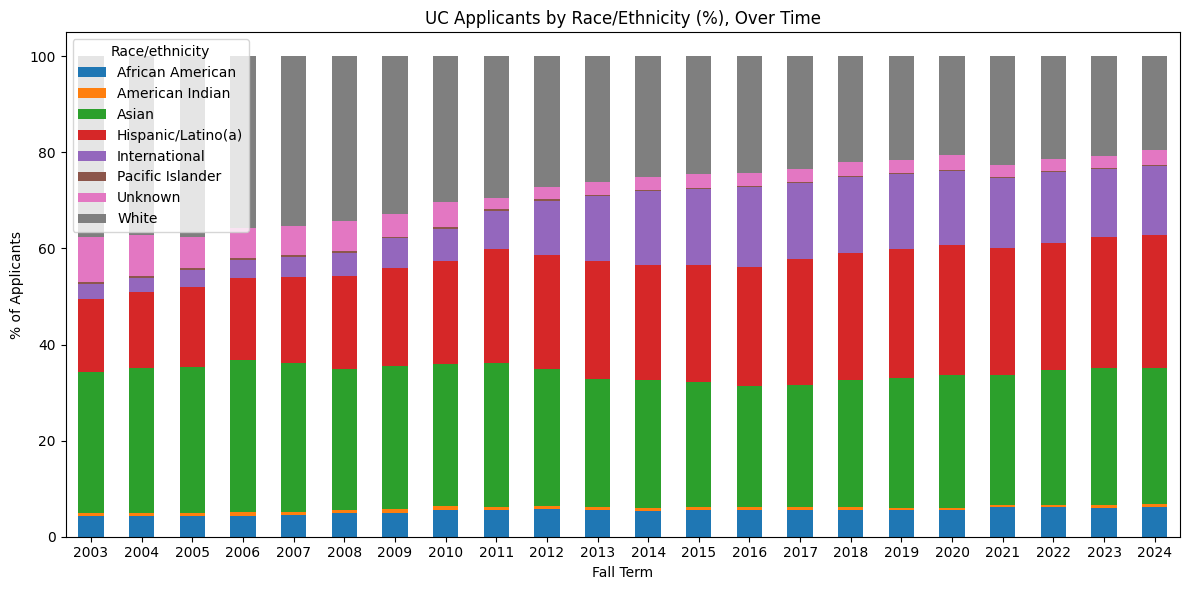

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
sys.path.append(os.path.abspath('../scripts'))
from clean_data import load_and_clean_ethnicity_data

df_eth_raw = pd.read_csv('../data/frosh_ethnicity.csv', encoding='utf-16', sep='\t')
print(df_eth_raw.columns.tolist())  # show actual column names
df_eth_raw.head()  # show sample data


df_eth = load_and_clean_ethnicity_data()
df_eth.head()

import matplotlib.pyplot as plt

# Make a copy and calculate percentages per year
df_pct = df_eth.copy()
df_pct['Total'] = df_pct.groupby('Fall term')['Applicants'].transform('sum')
df_pct['Percentage'] = df_pct['Applicants'] / df_pct['Total'] * 100

# Pivot for plotting
df_plot = df_pct.pivot(index='Fall term', columns='Race/ethnicity', values='Percentage')

# Plot
df_plot.plot(kind='bar', stacked=True, figsize=(12, 6),
             title='UC Applicants by Race/Ethnicity (%), Over Time')
plt.ylabel('% of Applicants')
plt.xlabel('Fall Term')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
